# Visualisation of Baton in Projectile Motion Using Python
In this Program we will be solving the baton problem using python and also visualising its motion using **Matplotlib** Library.

## Projectile Motion

We have started by making a class **Projectile_Motion** which is used to create a basic trajectory of a particle under projectile motion.
After declaring constuctor to accept values of **Initial Velocity** (*vo*) and **Angle of Projection** ($\theta$), we have defined fuctions named **get_X** and **get_Y** to calculate the postion of particle in x and y coordinate repectively, changing with respect to time (*t*).

To calculate the X and Y coordinate of the system we use **Equation of Projectile Motion**.
So, 
$$X = {V_{o}cos(\theta)t}$$
$$Y = {V_{o}sin(\theta)t - {gt^2 \over 2}}$$

**Note**: In the above example we have neglected the **Air Resistance**.

In [54]:
import numpy as np 
import matplotlib.pyplot as plt

class Projectile_Motion():
    def __init__(self,vo,theta):
        self.g = 10
        self.vo = vo
        self.the = theta
        time = 2*np.sin(self.the)*self.vo/self.g
        self.t = np.arange(0,time,.01)

    def get_X(self):
        return ((self.vo*np.cos(self.the))*self.t)
    
    def get_Y(self):
        return ((self.vo*np.sin(self.the)*self.t)-self.g*(self.t)**2/2)

    def plotgraph(self):
        X = self.get_X()
        Y = self.get_Y()
        plt.figure(dpi = 150)
        plt.title("Trajectory of a Projectile")
        plt.plot(X,Y,'o')
        plt.xlabel("Postion in X")
        plt.ylabel("Postion in Y")
        plt.legend(["Trajectory"])
        plt.show()

### Example

Below is an example to demostrate the use of class **Projectile_Motion**.

We have defined an instance *Ball* which represents a ball under projectile motion.

The initial velocity and angle of projection are given as 5 and $\pi\over4$ respectively.

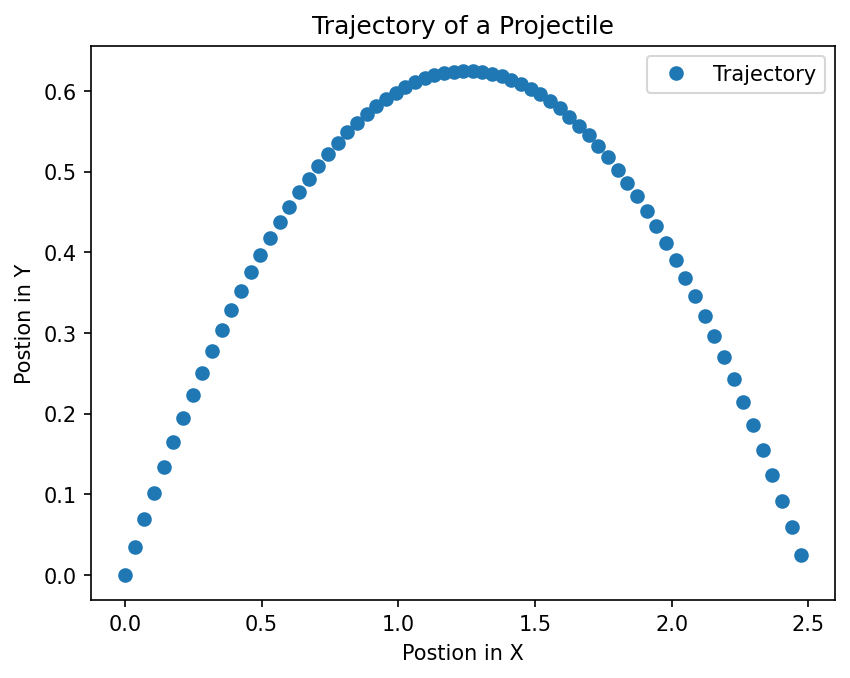

In [55]:
Ball = Projectile_Motion(5,np.pi/4)
Ball.plotgraph()

## Angular Motion of Masses

Now to trace the path of masses we will define a new class **Angular_Motion** which is inheriting the class **Projectile_Motion**. After setting up the constructor for the class we start by defining the various fuctions **cartesian_Xa**, **cartesian_Ya**, **cartesian_Xb**, **cartesian_Yb** to return the values of x and y Coordinates of Masses a and b. A point to note is that the only difference between *cartesian_Xa* and *cartesian_Xb* is the phase difference which is $\pi$ in this case. Its the same for other two functions of y coordinates.
$$Cartesian\_Xa = {{l\over2}-cos{(wt)}}$$
$$Cartesian\_Ya = {{l\over2}-sin{(wt)}}$$
$$Cartesian\_Xb = {{l\over2}-cos{(wt + \pi)}}$$
$$Cartesian\_Yb = {{l\over2}-sin{(wt + \pi)}}$$

**Here,**
* l : length of baton
* w : angular velocity of baton
* t : time

In the **PlotTrajectoryGraph** fuction we use above functions along with function **get_X** and **get_Y** to get the coordinates of the masses around center of mass as per the concept of superposition.

**Note**: We have assumed the masses to be of equal mass and at equal masses from center of mass. 

## 

In [56]:
class Angular_Motion(Projectile_Motion):
    def __init__(self, vo, theta,length,wo):
        Projectile_Motion.__init__(self,vo,theta)
        self.w = wo
        self.l = length
        self.the = theta

    def cartesian_Xa(self):
        return ((self.l/2)*(np.cos(self.w*self.t)))
    
    def cartesian_Ya(self):
        return ((self.l/2)*(np.sin(self.w*self.t)))

    def cartesian_Xb(self):
        return ((self.l/2)*(np.cos(self.w*self.t + np.pi)))
    
    def cartesian_Yb(self):
        return ((self.l/2)*(np.sin(self.w*self.t + np.pi)))
    
    
    def PlotTrajectoryGraph(self):
        X = self.get_X()
        Y = self.get_Y()
        MassA_X = X + self.cartesian_Xa()
        MassA_Y = Y + self.cartesian_Ya()
        MassB_X = X + self.cartesian_Xb()
        MassB_Y = Y + self.cartesian_Yb()
        plt.figure(dpi = 150)
        plt.title("Trajectory Path Of Baton")
        plt.xlabel("Postion in X")
        plt.ylabel("Postion in Y")
        plt.plot(MassA_X,MassA_Y,'o',color = '#fc466b')  
        plt.plot(MassB_X,MassB_Y,'o',color = '#00ff3b')
        plt.plot([MassA_X,MassB_X],[MassA_Y,MassB_Y],'#3f5efb')  
        plt.legend(["Ma","Mb","Baton"])
        # plt.plot(X,Y,'k')  # Uncomment to see trajectory of Center of mass (C.O.M)
        plt.show()  

### Example

Below is an example to demostrate the use of class **Angular_Motion**.

We have defined an instance *Baton* which represents a Baton under projectile motion.

The initial velocity, angle of projection, length of baton and angular velocity are given as 8, $\pi\over3$, 1 and 20 respectively.

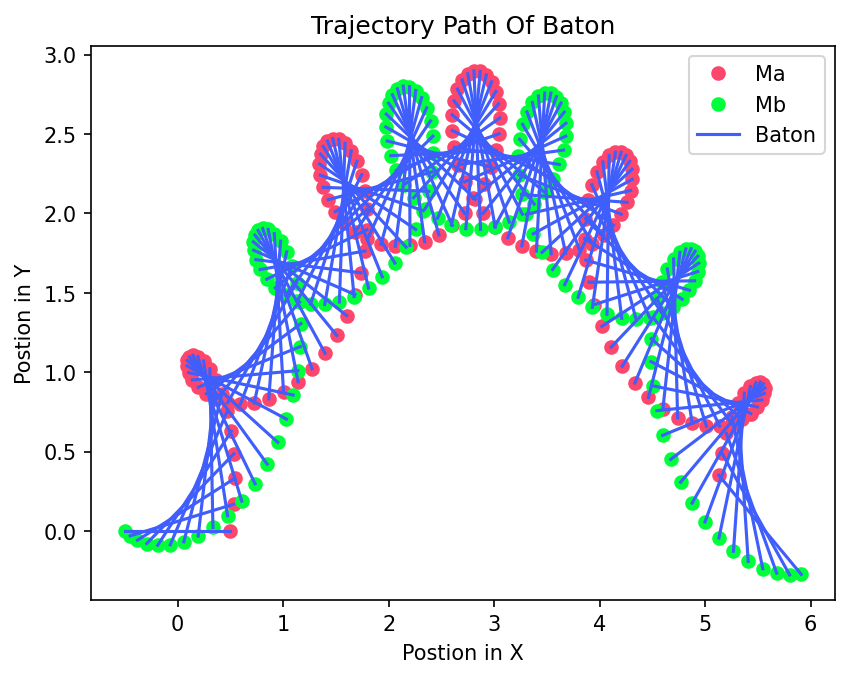

In [57]:
Baton = Angular_Motion(8,np.pi/3,1,20)
Baton.PlotTrajectoryGraph()